# Bandpass 0,5 -30

In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


#awal awal

In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~23 KiB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


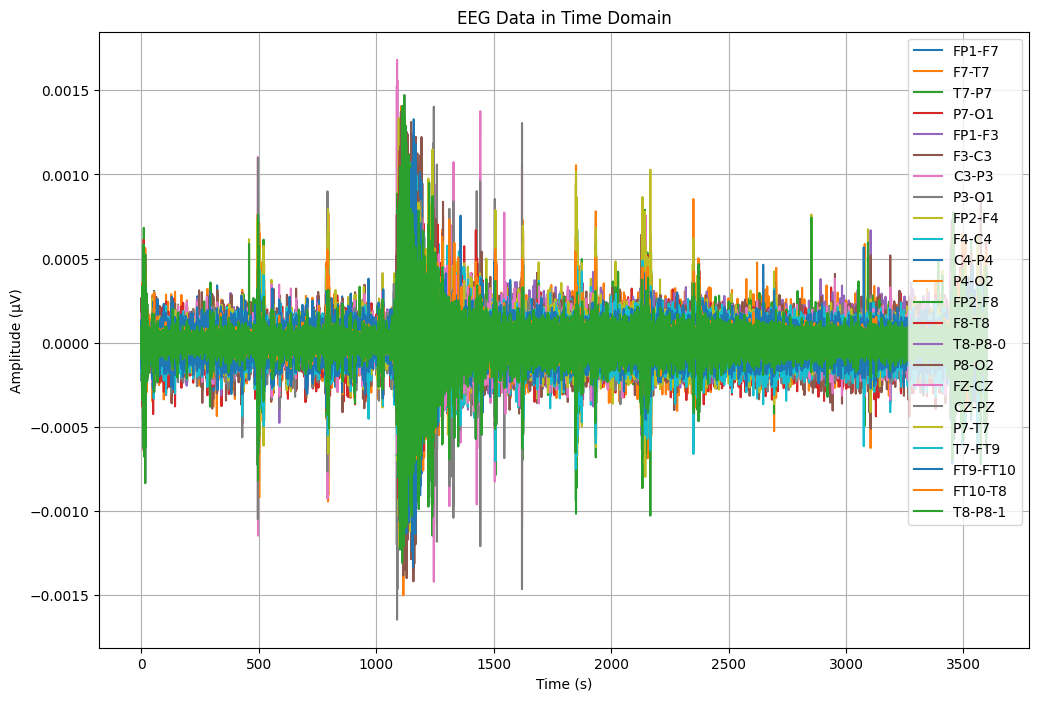

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:


# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 966   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1316    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]

# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/chb05_13.csv


In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000003,0.000061,-0.000005,-0.000032,-1.621490e-05,0.000047,8.791209e-06,-0.000013,0.000021,0.000060,...,-0.000010,-1.367521e-06,0.000051,1.934066e-05,5.665446e-06,-0.000008,-8.009768e-06,-7.228327e-06,-0.000010,966.000000
1,0.000006,0.000050,0.000001,-0.000032,-1.035409e-05,0.000044,4.102564e-06,-0.000012,0.000026,0.000046,...,-0.000013,9.768010e-07,0.000045,1.738706e-05,-9.768010e-07,-0.000015,-2.148962e-06,-3.321123e-06,-0.000013,966.003906
2,0.000005,0.000041,0.000009,-0.000034,-9.768010e-07,0.000038,1.953602e-07,-0.000015,0.000037,0.000032,...,-0.000011,-3.711844e-06,0.000035,1.074481e-05,-8.400488e-06,-0.000027,1.953602e-07,1.191697e-05,-0.000011,966.007812
3,0.000003,0.000032,0.000016,-0.000035,5.274725e-06,0.000030,-5.860806e-07,-0.000018,0.000044,0.000021,...,-0.000010,-1.191697e-05,0.000028,-1.953602e-07,-1.543346e-05,-0.000012,2.539683e-06,4.884005e-06,-0.000010,966.011719
4,-0.000003,0.000022,0.000025,-0.000029,8.400488e-06,0.000021,-5.860806e-07,-0.000014,0.000051,0.000007,...,-0.000004,-9.963370e-06,0.000024,-6.446886e-06,-2.442002e-05,-0.000002,8.009768e-06,-9.768010e-07,-0.000004,966.015625


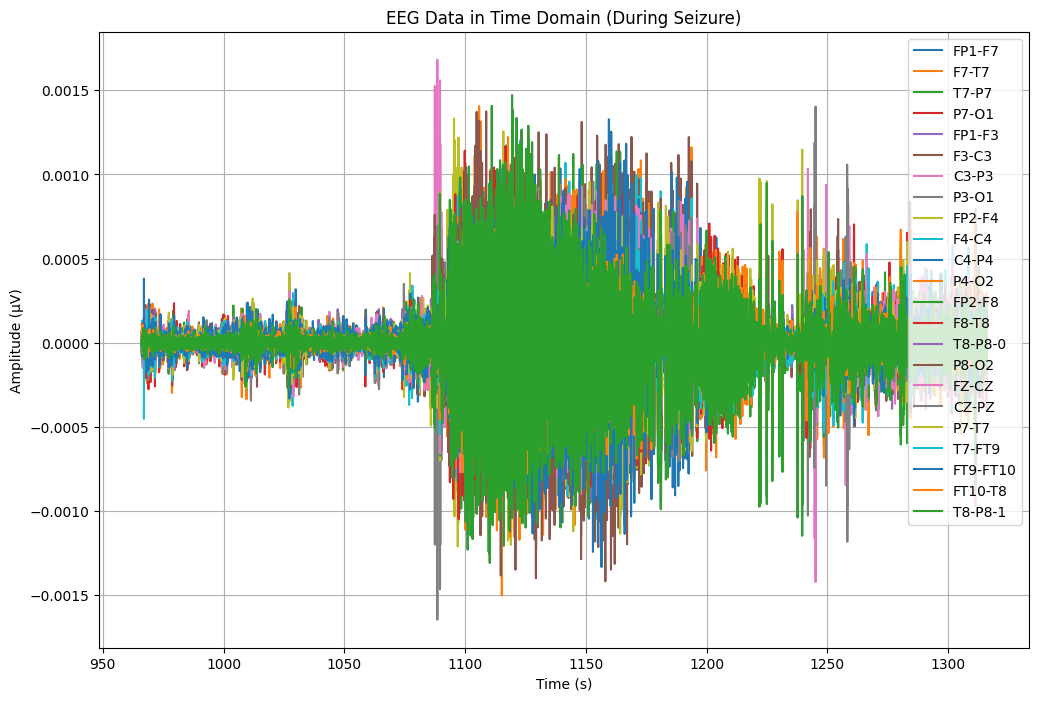

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


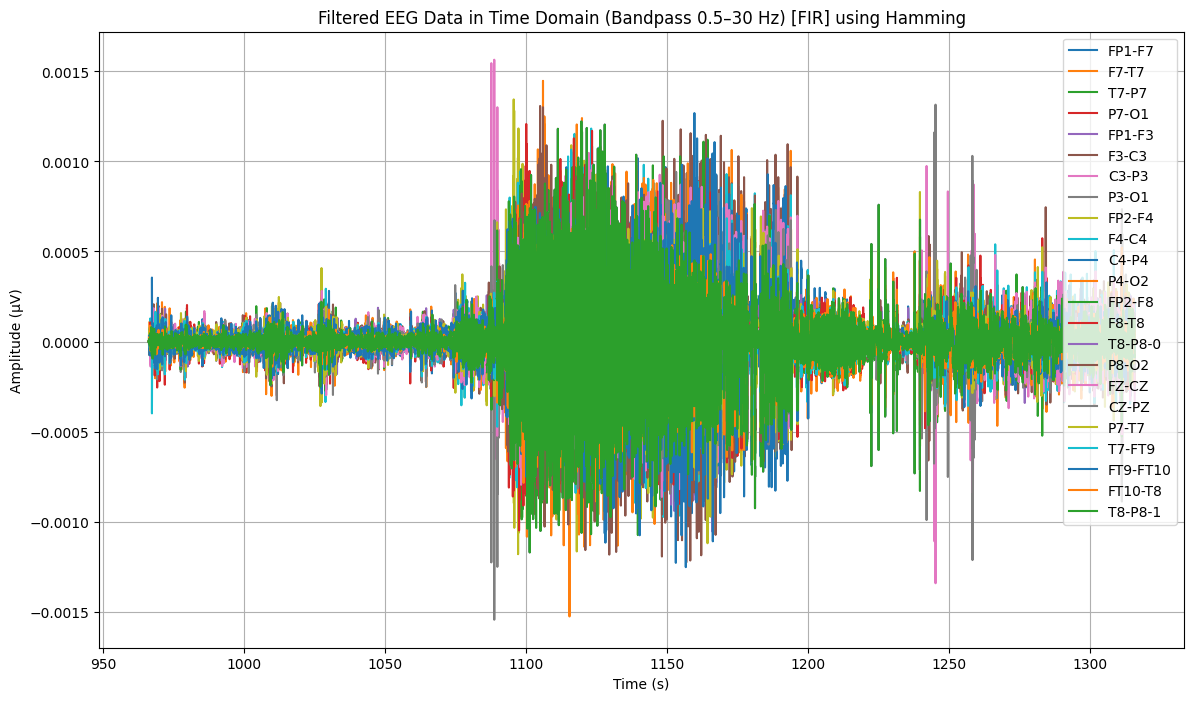

In [ ]:
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter band-pass menggunakan FIR
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
lowcut_freq = 0.5  # Frekuensi cutoff bawah dalam Hz
highcut_freq = 30  # Frekuensi cutoff atas dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Bandpass 0.5–30 Hz) [FIR] using Hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


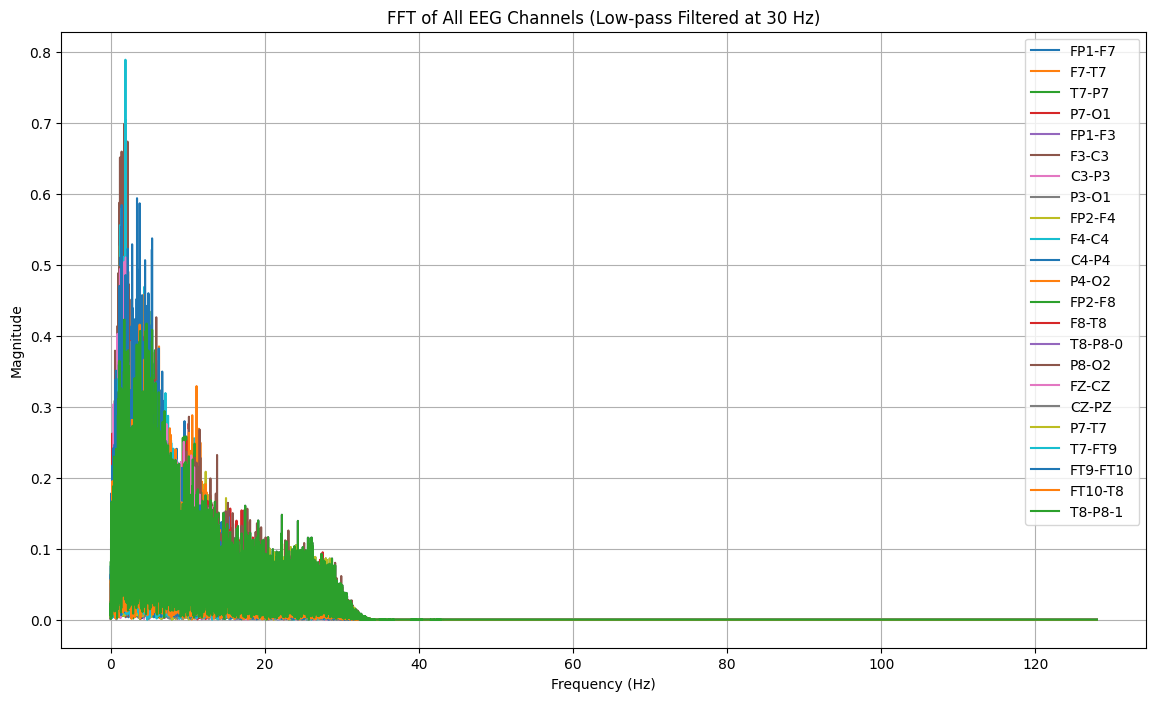

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


       Frequency (Hz)  FP1-F7 (Magnitude)  F7-T7 (Magnitude)  \
0            0.000000            0.017945           0.011882   
1            0.002857            0.005658           0.006496   
2            0.005714            0.009019           0.009255   
3            0.008571            0.004134           0.003519   
4            0.011429            0.001989           0.004417   
...               ...                 ...                ...   
44795      127.985714            0.000032           0.000011   
44796      127.988571            0.000035           0.000010   
44797      127.991429            0.000038           0.000007   
44798      127.994286            0.000031           0.000013   
44799      127.997143            0.000034           0.000013   

       T7-P7 (Magnitude)  P7-O1 (Magnitude)  FP1-F3 (Magnitude)  \
0               0.014550           0.017418            0.016005   
1               0.005367           0.002387            0.006327   
2               0.005807      

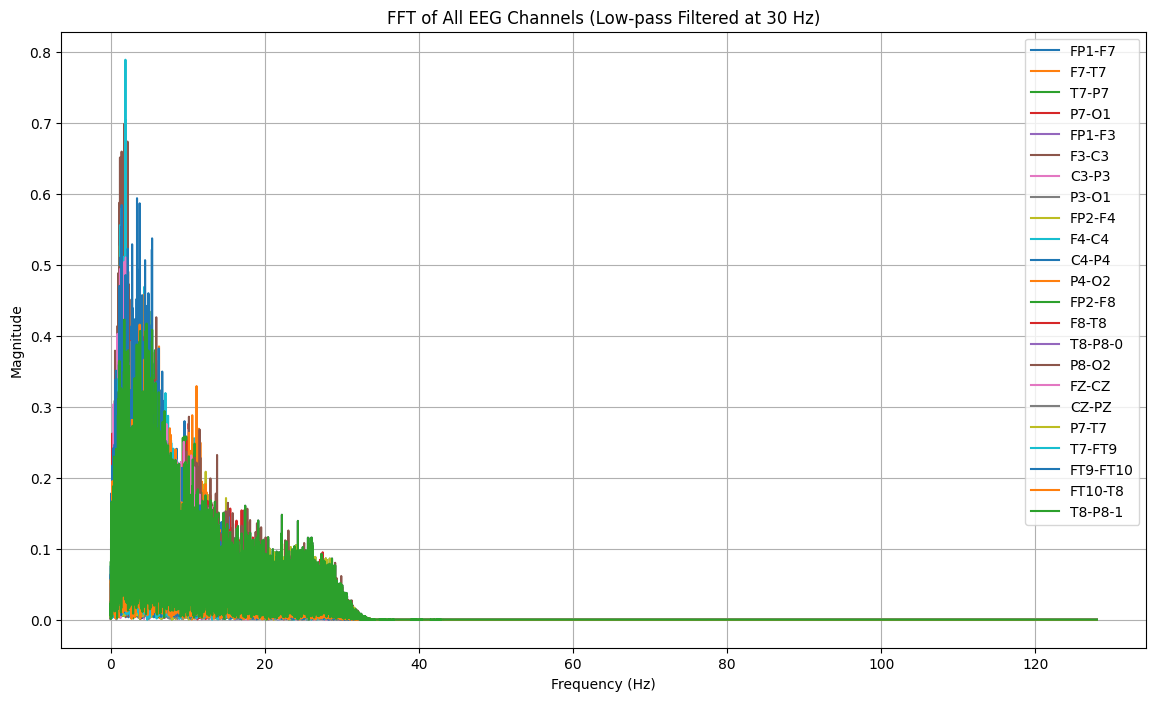

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat DataFrame kosong untuk menyimpan hasil FFT
fft_df = pd.DataFrame()

# Menghitung FFT untuk setiap saluran EEG dan memasukkan hasilnya ke dalam DataFrame
for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT

        # Membuat DataFrame untuk hasil FFT dari saluran ini
        channel_fft_df = pd.DataFrame({'Frequency (Hz)': fft_freqs, f'{channel} (Magnitude)': fft_vals})

        # Gabungkan ke DataFrame utama
        if fft_df.empty:
            fft_df = channel_fft_df
        else:
            fft_df = pd.merge(fft_df, channel_fft_df, on='Frequency (Hz)')

# Menampilkan DataFrame yang berisi frekuensi dan magnitude untuk setiap saluran EEG
print(fft_df)

# Plot hasil FFT untuk semua saluran EEG
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(fft_df['Frequency (Hz)'], fft_df[f'{channel} (Magnitude)'], label=channel)

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1088:
        return "tidak kejang"
    elif 1088 <= row['Time'] < 1239:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = fft_df.copy()
TA_1['seizure'] = fft_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

KeyError: 'Time'

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/hamming_bandpass_chb05_13.csv", index=False)

In [ ]:
# mengklasifikasikan menggunakan random forest

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Make sure to import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import the function from the correct module

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Import the necessary module
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))


# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      kejang       0.99      0.96      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.98     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.98      0.98      0.98     20020

Akurasi: 0.9827672327672328
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       0.99      0.96      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.98     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.98      0.98      0.98     20020



# kode fix

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-21-fe198d7a3fa3>:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data81 = mne.io.read_raw_edf(file81)


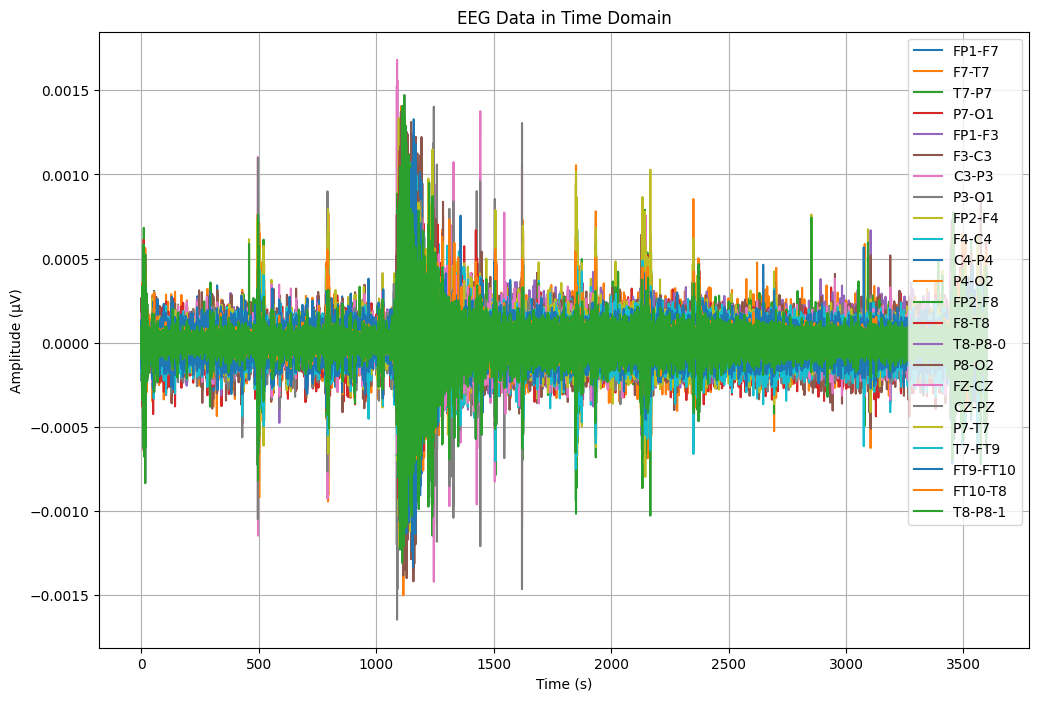

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/chb05_13.csv


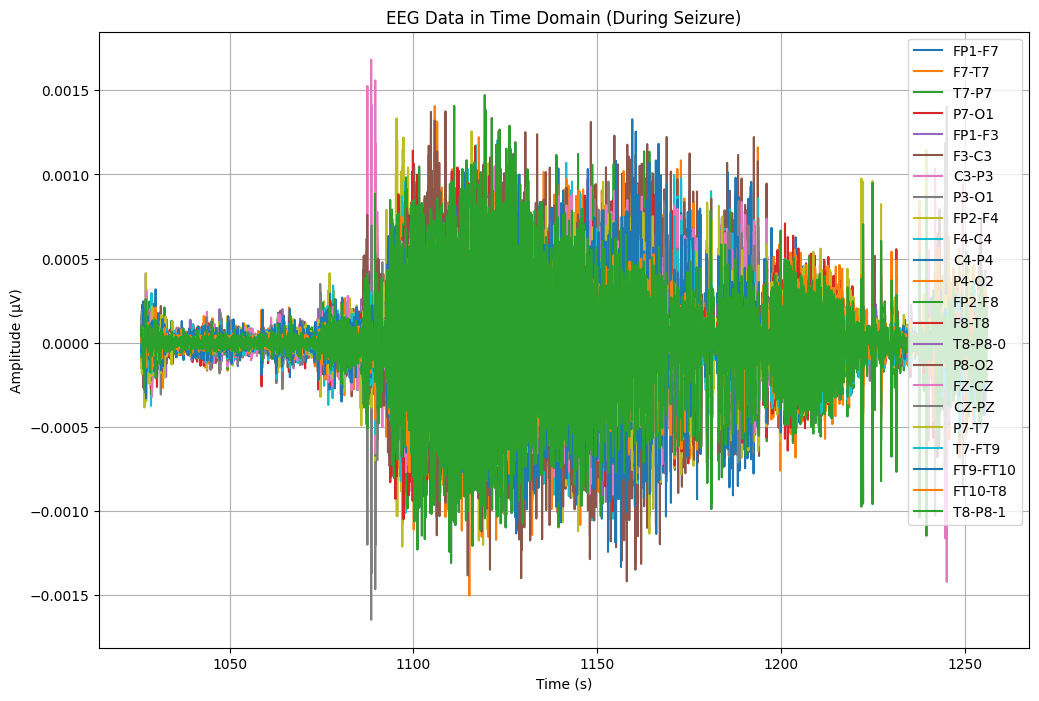

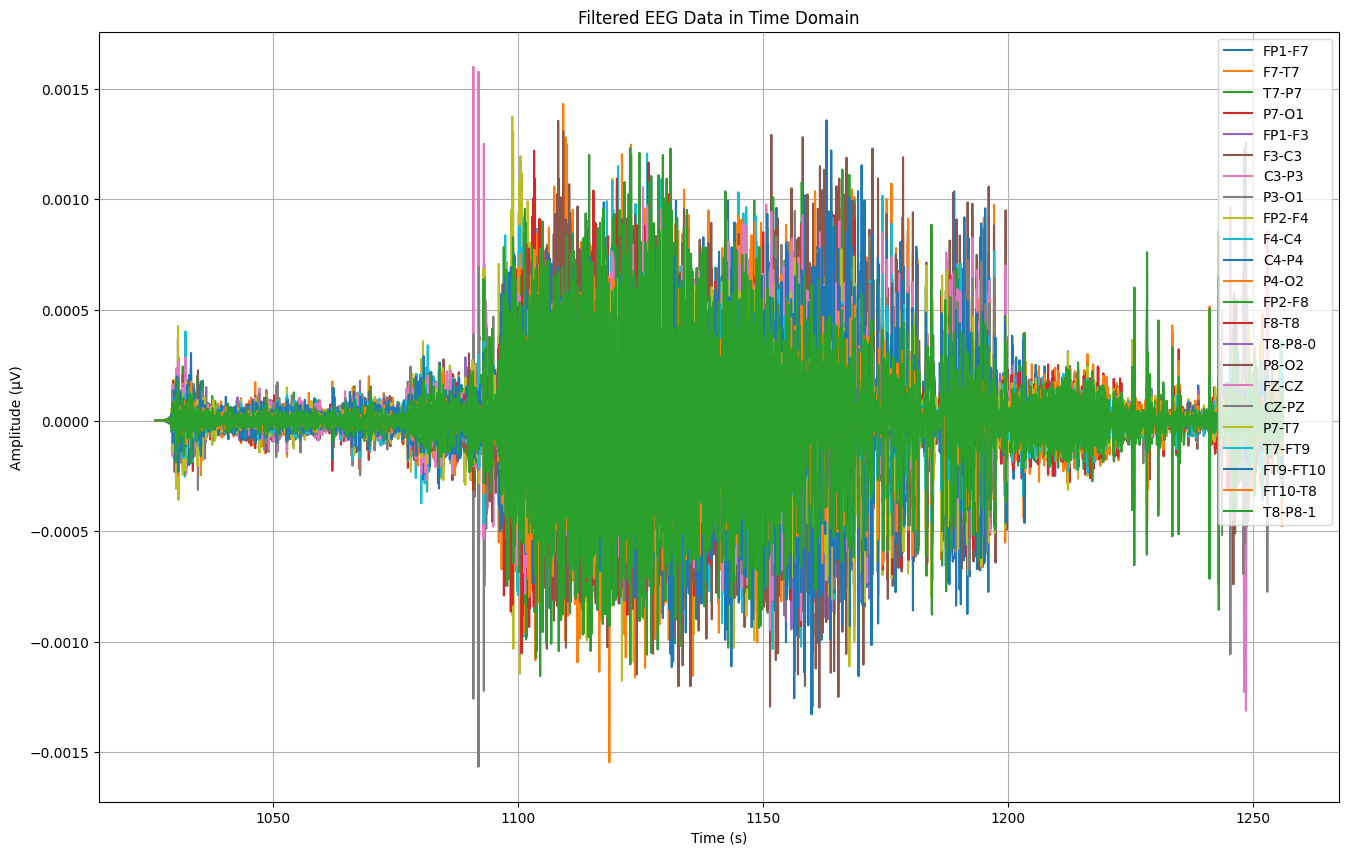

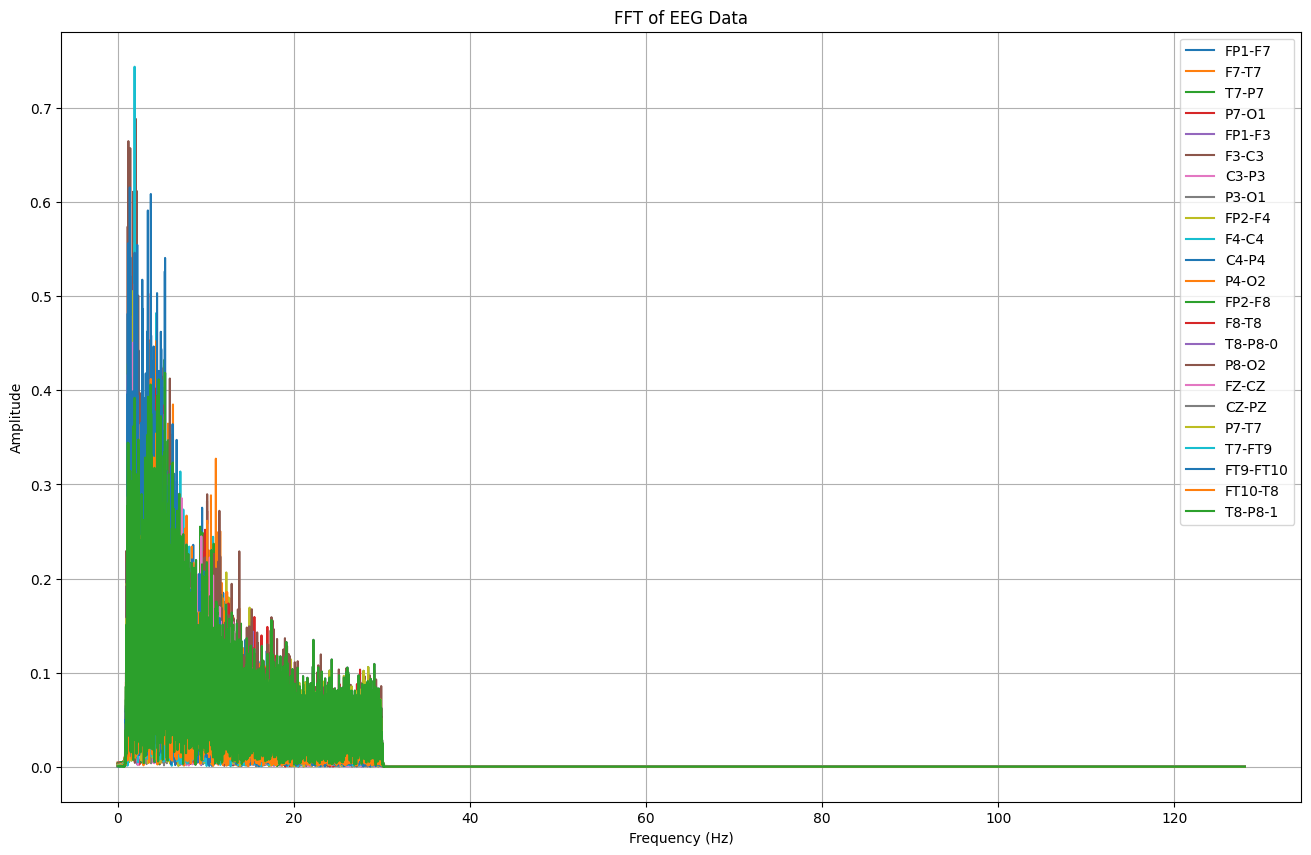

Akurasi: 0.9998301630434783
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      1.00      1.00      2816
tidak kejang       1.00      1.00      1.00      3072

    accuracy                           1.00      5888
   macro avg       1.00      1.00      1.00      5888
weighted avg       1.00      1.00      1.00      5888



In [ ]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load data
file81 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data81 = mne.io.read_raw_edf(file81)
data81

data, times = data81.get_data(return_times=True)
channel_names = data81.ch_names

df81 = pd.DataFrame(data.T, columns=channel_names)
df81['Time'] = times
df81.head()

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df81['Time']

# Plot raw EEG data
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df81[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

sample_rate = 256

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1026
end_time_seconds = 1256

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_cut = df81.iloc[start_index:end_index]

# Menyimpan data yang sudah di potong
csv_file = "/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

# Import data yang sudah dipotong
TA81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
TA81.head()

# Mengambil data waktu dari kolom 'Time'
time = TA81['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA81.columns:
        plt.plot(time, TA81[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

TA81['seizure'] = TA81.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
labeled_csv_file = "/content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv"
TA81.to_csv(labeled_csv_file, index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {labeled_csv_file}")

# Import data yang sudah dikasih label
TA_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
TA_81.head()


# Filter data
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

eeg_columns = TA81.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = TA81[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = TA81['Time'].values
filtered_df['seizure'] = TA81['seizure']


# Simpan data setelah filtering ke file CSV
filtered_csv_file = "/content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv"
filtered_df.to_csv(filtered_csv_file, index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {filtered_csv_file}")

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in filtered_df.columns:  # Memastikan kanal ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in filtered_df.columns:
        signal = filtered_df[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
fft_features_df = pd.DataFrame(fft_features).T
fft_features_df.columns = channels
fft_features_df['Time'] = filtered_df['Time']
fft_features_df['seizure'] = filtered_df['seizure']

# Simpan data setelah FFT ke file CSV
fft_csv_file = "/content/drive/MyDrive/TA/SAMPEL/fft_chb05_13.csv"
fft_features_df.to_csv(fft_csv_file, index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {fft_csv_file}")


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in fft_features_df.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(filtered_df[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

# Siapkan data untuk klasifikasi
X = fft_features_df.drop(['Time', 'seizure'], axis=1)
y = fft_features_df['seizure']

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Klasifikasi dengan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

In [ ]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load data
data81 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data81 = mne.io.read_raw_edf(file81)
data81

data, times = data81.get_data(return_times=True)
channel_names = data81.ch_names

df81 = pd.DataFrame(data.T, columns=channel_names)
df81['Time'] = times
df81.head()

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df81['Time']

# Plot raw EEG data
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df81[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

sample_rate = 256

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1026
end_time_seconds = 1256

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_cut = df81.iloc[start_index:end_index]

# Menyimpan data yang sudah di potong
csv_file = "/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

# Import data yang sudah dipotong
df_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
df_81.head()

# Mengambil data waktu dari kolom 'Time'
time = df_81['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_81.columns:
        plt.plot(time, df_81[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

df_81['seizure'] = df_81.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
labeled_csv_file = "/content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv"
df_81.to_csv(labeled_csv_file, index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {labeled_csv_file}")

# Import data yang sudah dikasih label
TA81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
TA81.head()



# Filter data
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

eeg_columns = TA81.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = TA81[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = TA81['Time'].values
filtered_df['seizure'] = TA81['seizure']


# Simpan data setelah filtering ke file CSV
filtered_csv_file = "/content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv"
filtered_df.to_csv(filtered_csv_file, index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {filtered_csv_file}")

# Import data yang sudah difiltering
TA_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
TA_81.head()

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA_81.columns:  # Memastikan kanal ada dalam data
        plt.plot(TA_81['Time'], TA_81[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA_81.columns:
        signal = TA_81[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
fft_features_df = pd.DataFrame(fft_features).T
fft_features_df.columns = channels
fft_features_df['Time'] = TA_81['Time']
fft_features_df['seizure'] = TA_81['seizure']

# Simpan data setelah FFT ke file CSV
fft_csv_file = "/content/drive/MyDrive/TA/SAMPEL/fft_chb05_13.csv"
fft_features_df.to_csv(fft_csv_file, index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {fft_csv_file}")

# Import data yang sudah di FFT
fft_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
fft_81.head()

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in fft_81.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA_81[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

# Siapkan data untuk klasifikasi
X = fft_81.drop(['Time', 'seizure'], axis=1)
y = fft_81['seizure']

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Klasifikasi dengan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-8f4bb4aacf31>:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data01 = mne.io.read_raw_edf(data01)


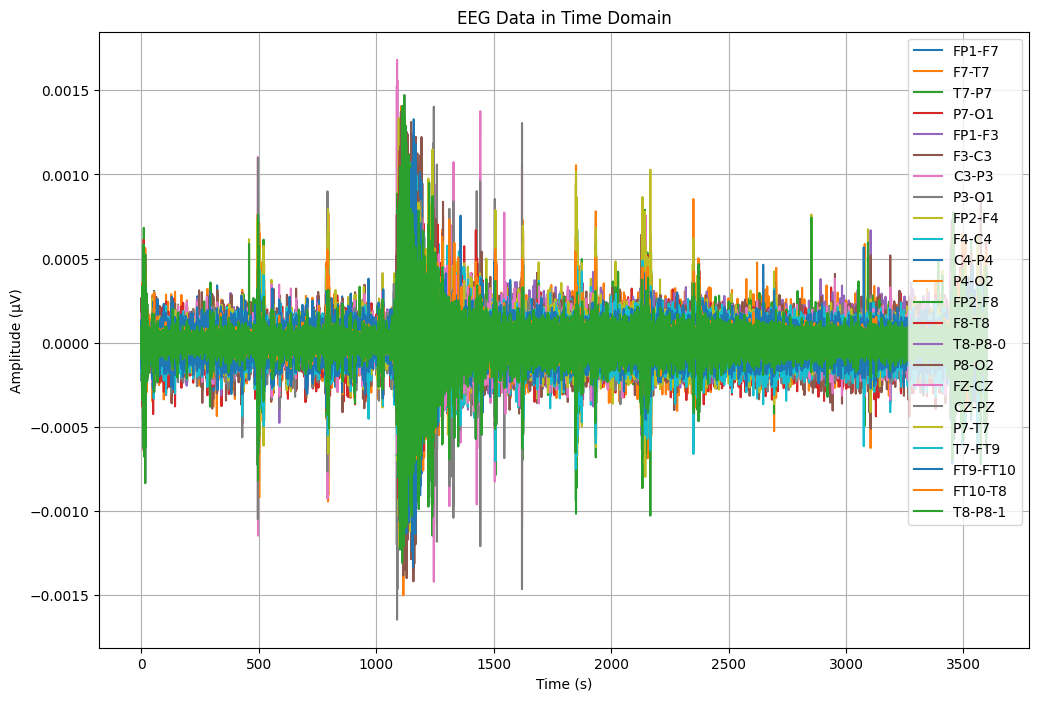

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/chb05_13.csv


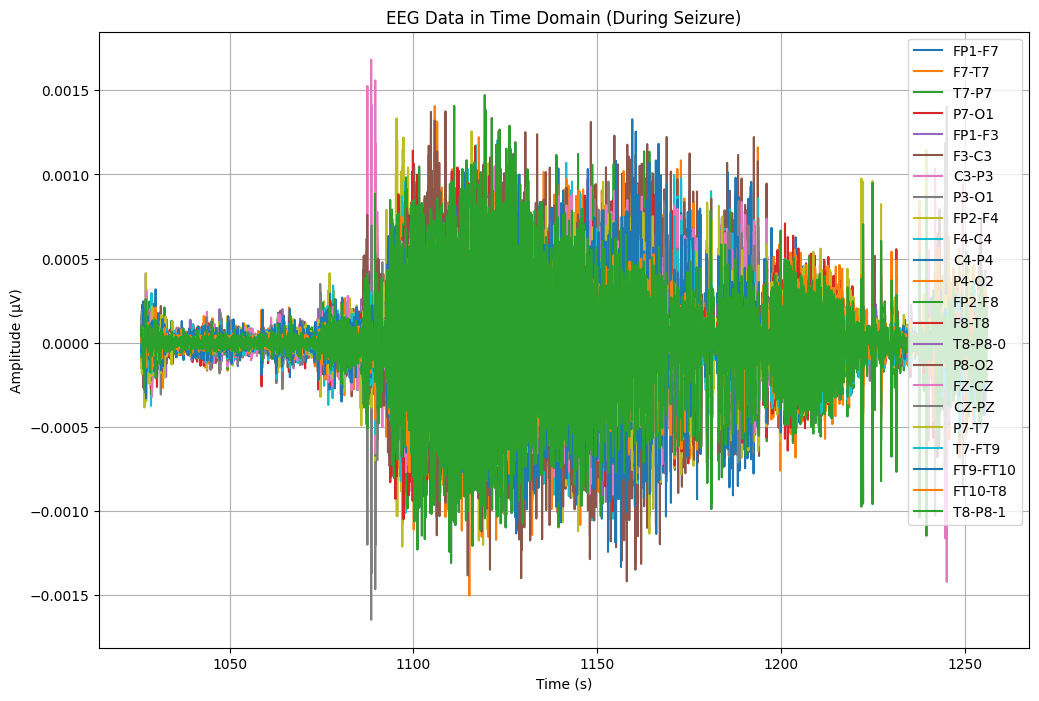

Data yang sudah diberi label berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv
Data setelah filtering berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv
Data setelah FFT berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/fft_chb05_13.csv


NameError: name 'TA_81' is not defined

<Figure size 1600x1000 with 0 Axes>

In [ ]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load data
data01 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data01 = mne.io.read_raw_edf(data01)
data01

data, times = data01.get_data(return_times=True)
channel_names = data01.ch_names

df01 = pd.DataFrame(data.T, columns=channel_names)
df01['Time'] = times
df01.head()

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df01['Time']

# Plot raw EEG data
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df01[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

sample_rate = 256

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1026
end_time_seconds = 1256

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_cut = df01.iloc[start_index:end_index]

# Menyimpan data yang sudah dipotong
csv_file = "/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

# Import data yang sudah dipotong
df_01 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv")
df_01.head()

# Membuat plot
time = df_01['Time']
plt.figure(figsize=(12, 8))
for channel in channels:
    if channel in df_01.columns:
        plt.plot(time, df_01[channel], label=channel)

plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

df_01['seizure'] = df_01.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
labeled_csv_file = "/content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv"
df_01.to_csv(labeled_csv_file, index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {labeled_csv_file}")

# Import data yang sudah diberi label
TA01 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv")
TA01.head()

# Filter data
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
num_taps = 1735
sampling_rate = 256

eeg_columns = TA01.columns[:-2]
eeg_data = TA01[eeg_columns].values

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = TA01['Time'].values
filtered_df['seizure'] = TA01['seizure']

# Simpan data setelah filtering ke file CSV
filtered_csv_file = "/content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv"
filtered_df.to_csv(filtered_csv_file, index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {filtered_csv_file}")

# Import data yang sudah difiltering
TA_01 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv")
TA_01.head()

# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA_01.columns:
        signal = TA_01[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
fft_features_df = pd.DataFrame(fft_features).T
fft_features_df.columns = channels
fft_features_df['Time'] = TA_01['Time']
fft_features_df['seizure'] = TA_01['seizure']

# Simpan data setelah FFT ke file CSV
fft_csv_file = "/content/drive/MyDrive/TA/SAMPEL/fft_chb05_13.csv"
fft_features_df.to_csv(fft_csv_file, index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {fft_csv_file}")

# Import data yang sudah di FFT
fft_01 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/fft_chb05_13.csv")
fft_01.head()


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in fft_01.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA_81[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

# Siapkan data untuk klasifikasi
X = fft_01.drop(['Time', 'seizure'], axis=1)
y = fft_01['seizure']

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Klasifikasi dengan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))